In [42]:
# targetType, sourceType, elodieSpType
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 
import random
data = pd.read_csv("D:\QuasarDetection\Dataset\QDataset.csv")
data.dropna()
print (data.shape)

(800000, 126)


In [43]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 126 columns):
 #   Column                Dtype  
---  ------                -----  
 0   specObjID             int64  
 1   instrument            object 
 2   run1d                 float64
 3   run2d                 int64  
 4   sourceType            object 
 5   targetType            object 
 6   ra                    float64
 7   dec                   float64
 8   cx                    float64
 9   cy                    float64
 10  cz                    float64
 11  xFocal                float64
 12  yFocal                float64
 13  lambdaEff             int64  
 14  blueFiber             int64  
 15  zOffset               int64  
 16  z                     float64
 17  zErr                  float64
 18  zWarning              int64  
 19  class                 object 
 20  subClass              object 
 21  rChi2                 float64
 22  DOF                   int64  
 23  rChi2Dif

In [44]:
# Get  columns whose data type is object
filteredColumns = data.dtypes[data.dtypes == np.object]
# list of columns whose data type is object
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)

['instrument', 'sourceType', 'targetType', 'class', 'subClass', 'elodieFileName', 'elodieObject', 'elodieSpType']


In [45]:
# Unique values of these object type columns
for i in listOfColumnNames:
    print(i, data[i].nunique())

instrument 1
sourceType 22
targetType 3
class 3
subClass 50
elodieFileName 735
elodieObject 650
elodieSpType 177


In [46]:
# Get all columns
allColumns = data.columns.tolist()

singValCol= []
# Select single Unique valued columns
for i in allColumns:
    if data[i].nunique() == 1:
        print(i, data[i].nunique())
        singValCol.append(i)

instrument 1
run2d 1
lambdaEff 1
blueFiber 1
zOffset 1
z_noqso 1
zErr_noqso 1
zWarning_noqso 1
rChi2Diff_noqso 1
z_person 1
velDispZ 1
velDispZErr 1
deredSN2 1
snTurnoff 1


In [47]:
#dropping single valued columns
for i in singValCol:
    data=data.drop(i,1)

In [48]:
data.head(100)

,specObjID,run1d,sourceType,targetType,ra,dec,cx,cy,cz,xFocal,...,elodieSpType,elodieBV,elodieTEff,elodieLogG,elodieFeH,elodieZ,elodieZErr,elodieZModelErr,elodieRChi2,elodieDOF
0,299489677444933632,NaN,GALAXY,SCIENCE,146.71421,-1.041304,-0.835805,0.548725,-0.018173,179.0361,...,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,299489952322840576,NaN,GALAXY,SCIENCE,146.74413,-0.652191,-0.836176,0.548343,-0.011383,185.4258,...,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,299490227200747520,NaN,SERENDIPITY_BLUE,SCIENCE,146.90229,-0.984913,-0.837617,0.545988,-0.017189,220.1296,...,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,299490502078654464,NaN,GALAXY,SCIENCE,146.62857,-0.765137,-0.835048,0.550015,-0.013354,160.2525,...,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,299491051834468352,NaN,GALAXY,SCIENCE,146.63167,-0.988278,-0.835028,0.549937,-0.017248,160.9880,...,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,299518264747255808,NaN,QSO,SCIENCE,146.61904,-0.434322,-0.835007,0.550187,-0.007580,158.1304,...,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
96,299518539625162752,NaN,GALAXY,SCIENCE,146.62966,-0.465689,-0.835105,0.550030,-0.008128,160.4472,...,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
97,299518814503069696,NaN,GALAXY,SCIENCE,146.49052,-0.369310,-0.833777,0.552063,-0.006446,130.1131,...,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
98,299519089380976640,NaN,GALAXY,SCIENCE,146.75170,-0.408392,-0.836281,0.548254,-0.007128,187.0424,...,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [49]:
#Finding NaN containing columns
naNCols = data.columns[data.isna().any()].tolist()
print(naNCols)

for i in naNCols:
    print(i, data[i].isna().sum())

['run1d', 'subClass', 'class_noqso', 'subClass_noqso', 'elodieFileName', 'elodieObject', 'elodieSpType']
run1d 800000
subClass 379747
class_noqso 800000
subClass_noqso 800000
elodieFileName 634531
elodieObject 634531
elodieSpType 634531


In [50]:
# As we have no method to fill these none values we will drop them
for i in naNCols:
    data=data.drop(i,1)

In [51]:
# Get  columns whose data type is object and which are left
filteredColumns = data.dtypes[data.dtypes == np.object]
# list of columns whose data type is object
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)

['sourceType', 'targetType', 'class']


In [52]:
#One Hot Encoding Categorical Data
for i in listOfColumnNames:
    data=pd.get_dummies(data, columns=[i])
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 130 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   specObjID                       int64  
 1   ra                              float64
 2   dec                             float64
 3   cx                              float64
 4   cy                              float64
 5   cz                              float64
 6   xFocal                          float64
 7   yFocal                          float64
 8   z                               float64
 9   zErr                            float64
 10  zWarning                        int64  
 11  rChi2                           float64
 12  DOF                             int64  
 13  rChi2Diff                       float64
 14  velDisp                         float64
 15  velDispErr                      float64
 16  velDispChi2                     float64
 17  velDispNPix                 

In [53]:
# Dropping redundant One Hot Encoded variables
data = data.drop('sourceType_STAR_WHITE_DWARF', 1)
data = data.drop('targetType_STANDARD', 1)
data = data.drop('class_GALAXY',1)
data = data.drop('class_STAR',1)

In [54]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 126 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   specObjID                       int64  
 1   ra                              float64
 2   dec                             float64
 3   cx                              float64
 4   cy                              float64
 5   cz                              float64
 6   xFocal                          float64
 7   yFocal                          float64
 8   z                               float64
 9   zErr                            float64
 10  zWarning                        int64  
 11  rChi2                           float64
 12  DOF                             int64  
 13  rChi2Diff                       float64
 14  velDisp                         float64
 15  velDispErr                      float64
 16  velDispChi2                     float64
 17  velDispNPix                 

In [60]:
# Converting float64 to float32 
df = data

# Get  columns whose data type is float64
filteredColumns = data.dtypes[data.dtypes == np.float64]
# list of columns whose data type is object
listOfColumnNames = list(filteredColumns.index)

# Conversion
for i in listOfColumnNames:
    df[i] = pd.to_numeric(df[i], errors = 'raise', downcast = 'float')

In [62]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 126 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   specObjID                       int64  
 1   ra                              float32
 2   dec                             float32
 3   cx                              float32
 4   cy                              float32
 5   cz                              float32
 6   xFocal                          float32
 7   yFocal                          float32
 8   z                               float32
 9   zErr                            float32
 10  zWarning                        int64  
 11  rChi2                           float32
 12  DOF                             int64  
 13  rChi2Diff                       float32
 14  velDisp                         float32
 15  velDispErr                      float32
 16  velDispChi2                     float32
 17  velDispNPix                 

In [70]:
x = df.drop('class_QSO',1)
y = pd.array(df['class_QSO'])
print (x.shape)
print (y.shape)
print(df['class_QSO'].value_counts())

(800000, 125)
(800000,)
0    725896
1     74104
Name: class_QSO, dtype: int64


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 126 entries, specObjID to class_QSO
dtypes: float32(93), int64(9), uint8(24)
memory usage: 357.1 MB


In [72]:
from sklearn.model_selection import train_test_split 
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.005, random_state=12) 
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier() 
rf.fit(xTrain, yTrain) 
yPred = rf.predict(xTest)

In [73]:
# Evaluating the classifier 
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

n_errors = (yPred != yTest).sum() 

f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 

ac = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(ac)) 

pr = precision_score(yTest, yPred) 
print("The precision is {}".format(pr)) 

rc = recall_score(yTest, yPred) 
print("The recall is {}".format(rc))

The F1-Score is 0.9808219178082191
The accuracy is 0.9965
The precision is 0.988950276243094
The recall is 0.9728260869565217


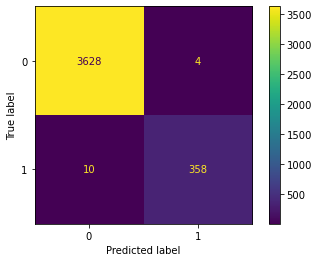

In [81]:
#plotting COfusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, xTest, yTest)
plt.show()  